In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [3]:
df = pd.read_csv('/content/iris_data ai mse 1.csv')

In [4]:
print(df.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth     Species
0     7.303275    2.475025     2.176049    0.695003      Setosa
1     7.556928    2.987381     1.921585    1.172615  Versicolor
2     5.254016    2.093516     3.672564    0.550424   Virginica
3     6.409620    2.211042     1.812869    1.745372  Versicolor
4     7.684009    4.056479     4.244270    0.772148      Setosa


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  20 non-null     float64
 1   SepalWidth   20 non-null     float64
 2   PetalLength  20 non-null     float64
 3   PetalWidth   20 non-null     float64
 4   Species      20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 932.0+ bytes
None


In [8]:
# prompt: Check for duplicate rows in this dataset and drop the duplicate ones



# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

# Drop duplicate rows (inplace=True modifies the original DataFrame)
df.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
print("\nDataFrame after removing duplicates:")
print(df.info())


Duplicate Rows:
Empty DataFrame
Columns: [SepalLength, SepalWidth, PetalLength, PetalWidth, Species]
Index: []

DataFrame after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  20 non-null     float64
 1   SepalWidth   20 non-null     float64
 2   PetalLength  20 non-null     float64
 3   PetalWidth   20 non-null     float64
 4   Species      20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 932.0+ bytes
None


In [10]:
# prompt: Check for missing values in this dataset, and print it after removing duplicate values

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64


In [15]:
# prompt: Create a data frame from the dataset

# Assuming df is already defined and loaded as in the previous code

# Now you can work with the cleaned DataFrame 'df'
print(df.head()) # Display first few rows
print(df.describe()) # Summary statistics
# ... further analysis ...


   SepalLength  SepalWidth  PetalLength  PetalWidth     Species
0     7.303275    2.475025     2.176049    0.695003      Setosa
1     7.556928    2.987381     1.921585    1.172615  Versicolor
2     5.254016    2.093516     3.672564    0.550424   Virginica
3     6.409620    2.211042     1.812869    1.745372  Versicolor
4     7.684009    4.056479     4.244270    0.772148      Setosa
       SepalLength  SepalWidth  PetalLength  PetalWidth
count    20.000000   20.000000    20.000000   20.000000
mean      6.542853    2.860428     3.612923    1.258606
std       1.140714    0.798984     1.715889    0.628400
min       4.668608    2.032034     1.653576    0.108212
25%       5.398961    2.195528     2.006631    0.752862
50%       6.536426    2.474535     3.554048    1.350736
75%       7.588698    3.776238     5.044541    1.605944
max       7.880377    4.056479     6.424217    2.425674


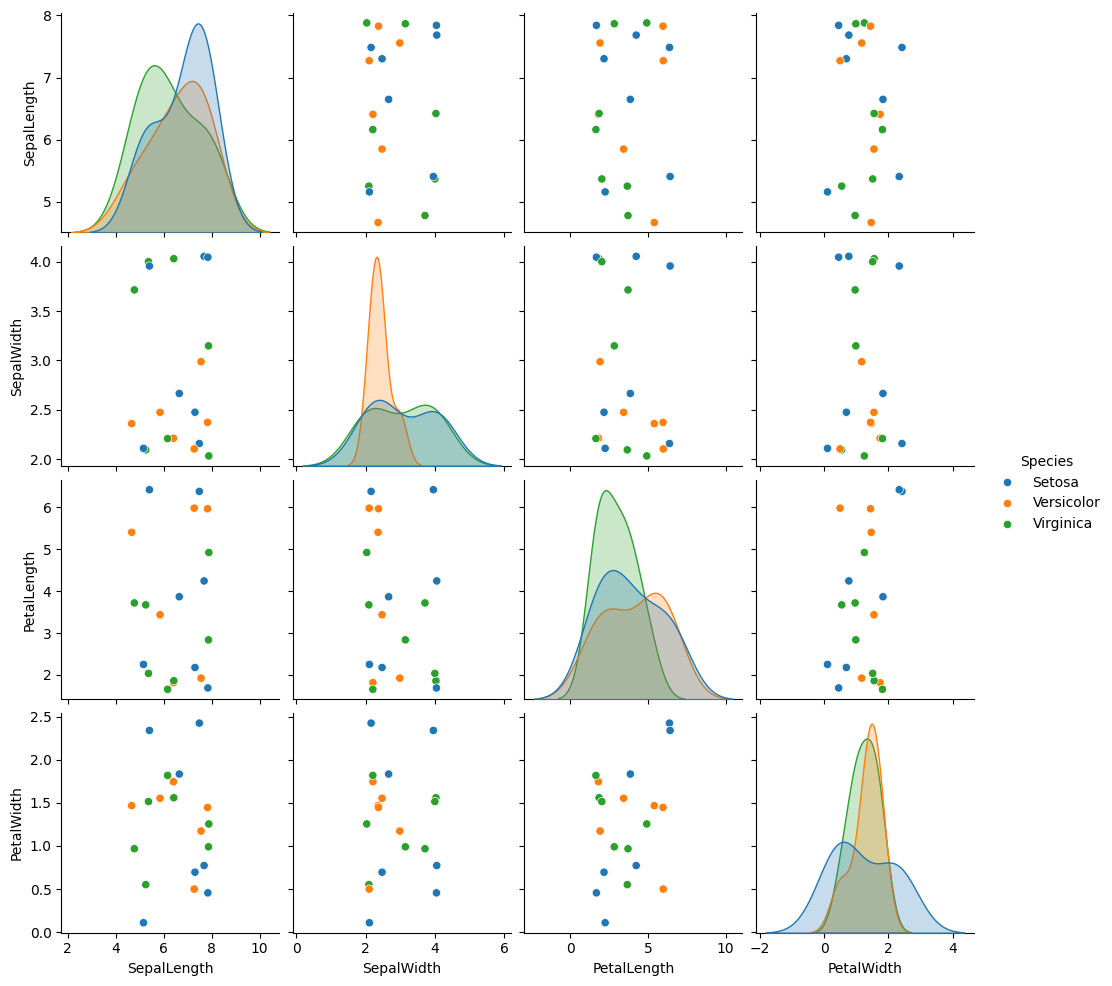

ValueError: could not convert string to float: 'Setosa'

In [22]:
# prompt: Create a plot for this dataset to visualize relationship between features. Give code which works in google colab

# Assuming df is already defined and loaded as in the previous code

# Create a pairplot to visualize relationships between features
# Replace 'species' with the actual name of the column containing species information
# If the column name is 'Species', use hue='Species'
sns.pairplot(df, hue='Species')  # Changed 'species' to 'Species'
plt.show()

# Create a heatmap to visualize correlation between features
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

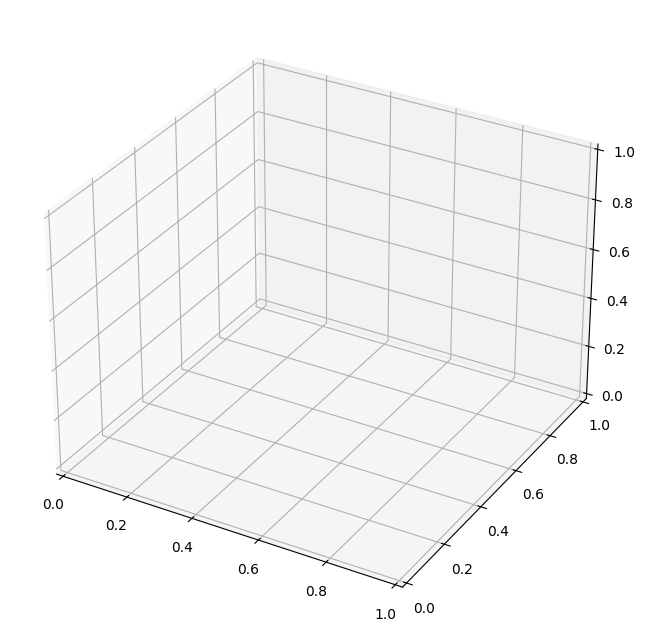

In [24]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

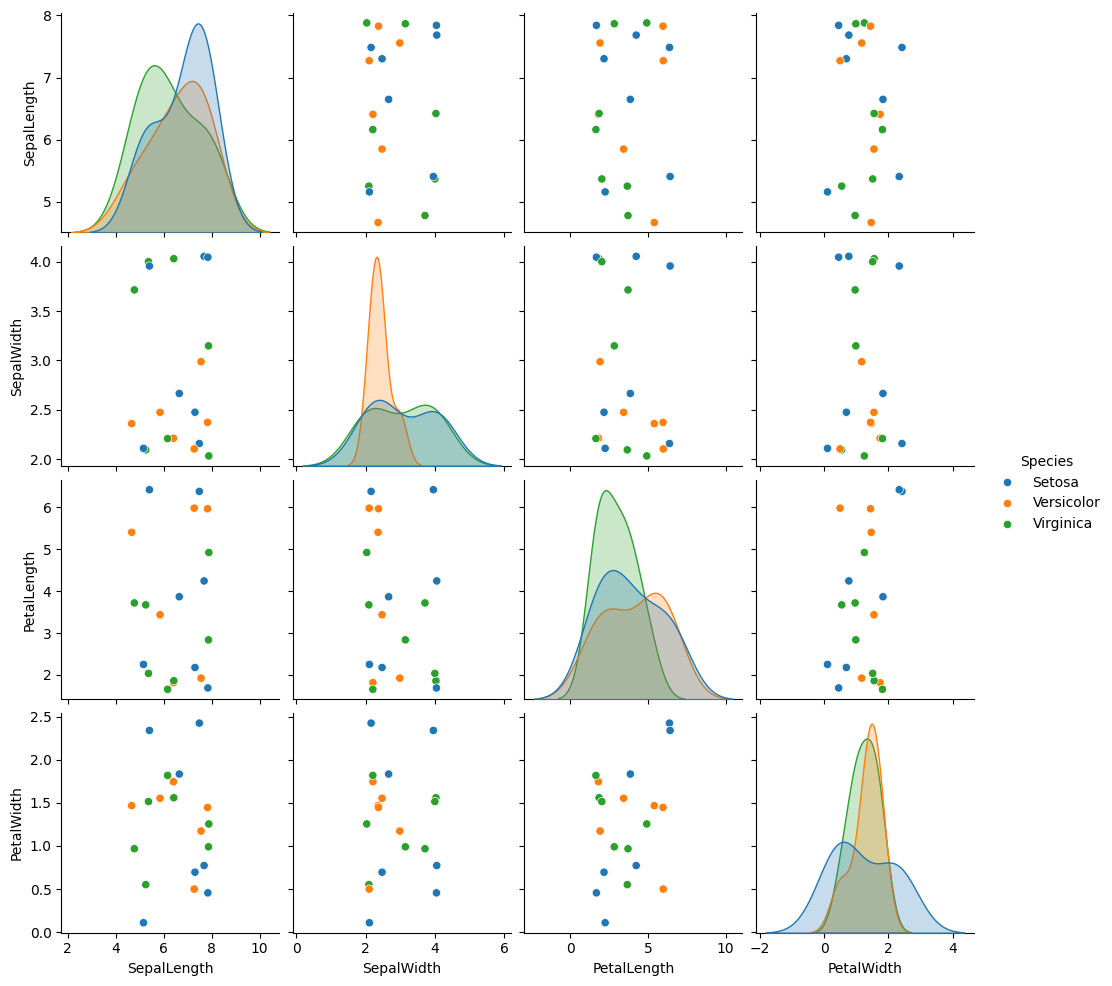

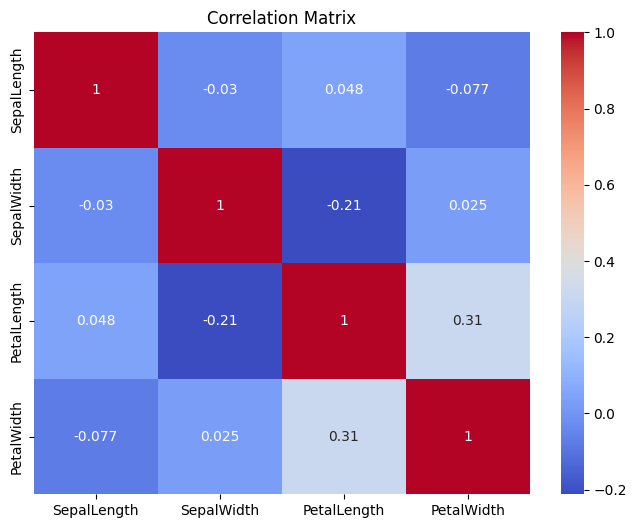

In [23]:
# prompt: Create a plot for this dataset to visualize relationship between features. Give code which works in google colab

# Assuming df is already defined and loaded as in the previous code

# Create a pairplot to visualize relationships between features
# Replace 'species' with the actual name of the column containing species information
# If the column name is 'Species', use hue='Species'
sns.pairplot(df, hue='Species')  # Changed 'species' to 'Species'
plt.show()

# Create a heatmap to visualize correlation between features
# Select only numerical features for correlation calculation
numerical_features = df.select_dtypes(include=['number']) # Select numerical columns only
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [36]:
# Plot the data points
colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}
# Use actual column names from the DataFrame 'df'
# Assuming your columns are named 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', and 'Species'
ax.scatter(df['SepalLength'], df['PetalLength'], df['PetalWidth'],
           c=df['Species'].map(colors), label=df['Species'], s=50)

In [28]:
# prompt: Create a 3D plot to visualize data in 3D. Give code that works in google colab

# Assuming 'SepalLength', 'SepalWidth', and 'PetalLength' are columns in your DataFrame
x = df['SepalLength']  # Changed 'sepal_length' to 'SepalLength'
y = df['SepalWidth']   # Changed 'sepal_width' to 'SepalWidth'
z = df['PetalLength']  # Changed 'petal_length' to 'PetalLength'

ax.scatter(x, y, z, c=z, cmap='viridis')  # Use 'z' values for color mapping
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot of Iris Data')
plt.show()

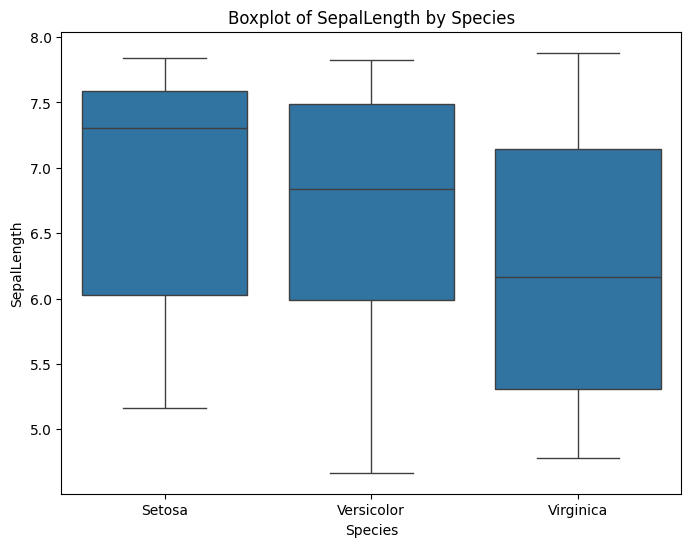

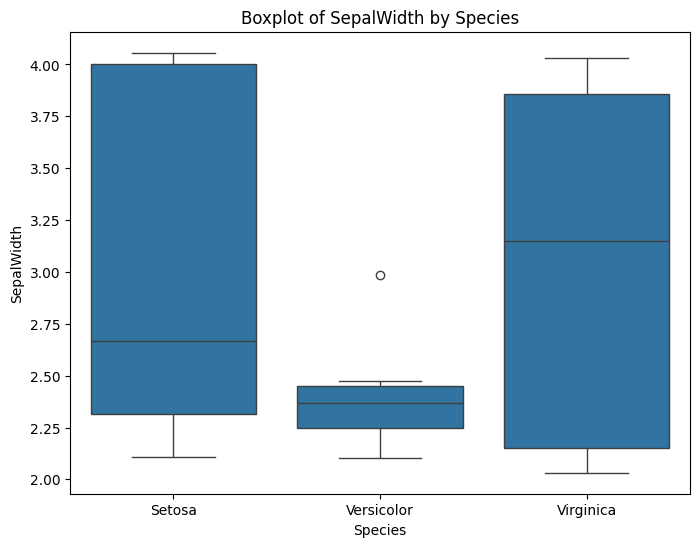

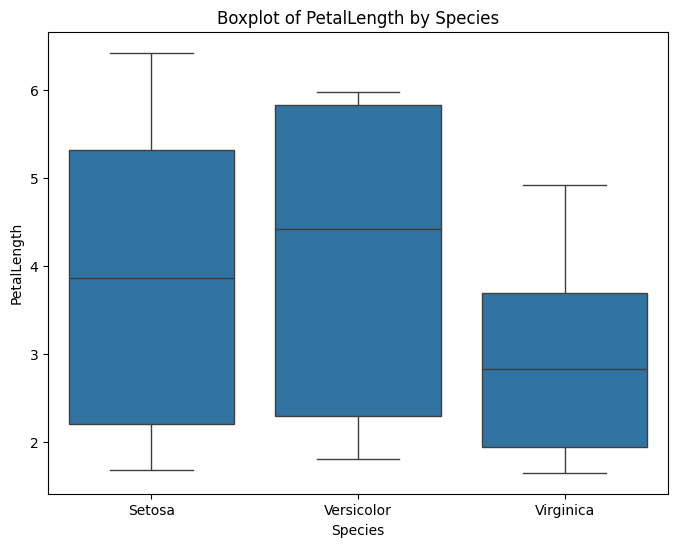

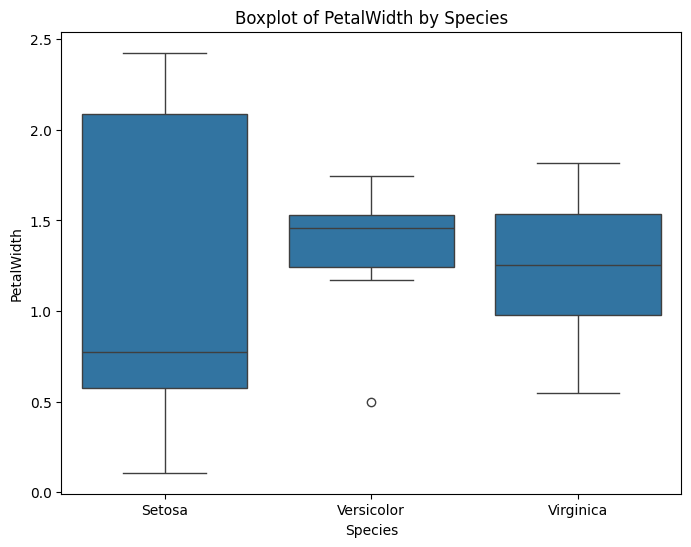

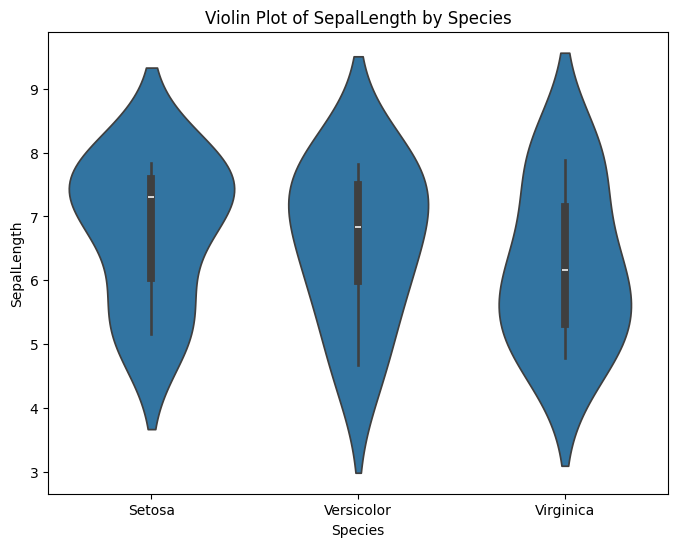

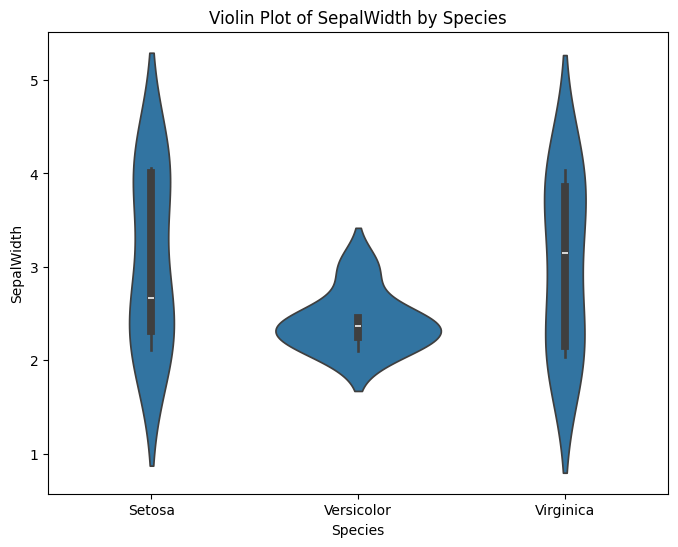

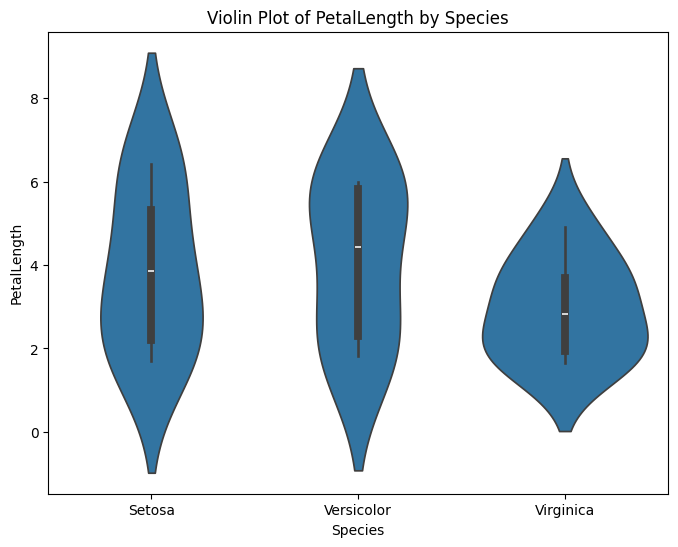

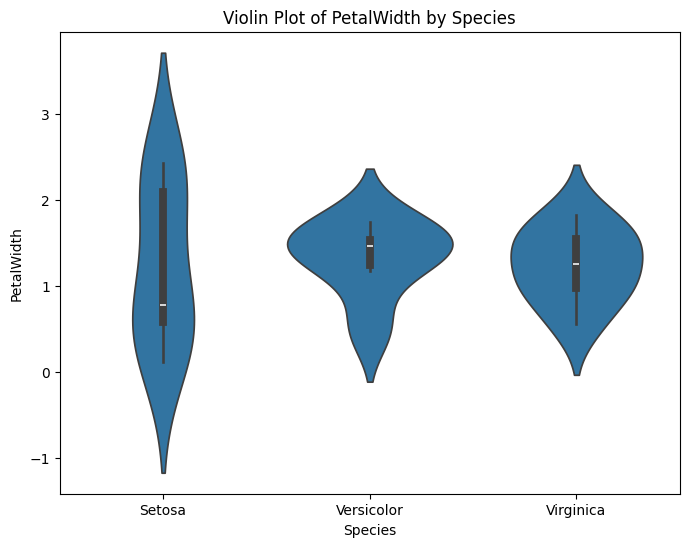

In [37]:
# prompt: Create a graph of this dataset

# Assuming df is already defined and loaded as in the previous code

# Create a boxplot to visualize the distribution of each feature for each species
for column in df.columns[:-1]:  # Exclude the last column (species)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Species', y=column, data=df)
    plt.title(f'Boxplot of {column} by Species')
    plt.show()

# Create a violin plot to visualize the distribution of each feature for each species
for column in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Species', y=column, data=df)
    plt.title(f'Violin Plot of {column} by Species')
    plt.show()
